In [18]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt

plt.rc('font', size = 8)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
sns.set_style("ticks")


In [19]:
pfp = '/home/ngr4/project/edge_feat/results'

In [20]:
sample

'liao_gat3'

In [21]:
for i,f in enumerate(glob.glob(os.path.join(pfp, '*.txt'))):
    sample = os.path.split(f)[1].split(('.txt'))[0]
    temp = pd.read_csv(f, header=None, sep='=')
    temp['Train'] = temp[1].apply(lambda x:float(x.split(' <')[0]))
    temp['Val'] = temp[3].apply(lambda x:float(x.split(' <')[0]))
    temp['Model'] = sample
    temp['Epoch'] = list(range(1,temp.shape[0]+1))
    temp = temp.drop(columns=[0,1,2,3,4])
    temp = temp.melt(id_vars=['Model','Epoch'],
                     value_vars=['Train','Val'],
                     var_name='Loss',
                     value_name='Negative log likelihood')
    if i==0:
        loss = temp
    else:
        loss = loss.append(temp, ignore_index=True)


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


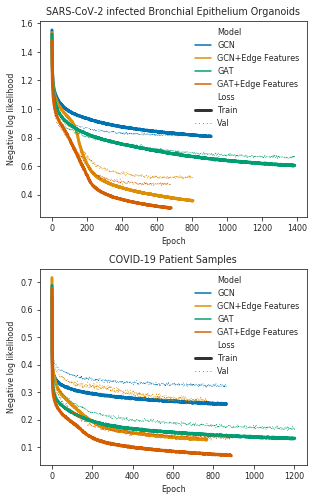

In [24]:
loss_hbec = loss.loc[['hbec' in i for i in loss['Model']],:]
loss_liao = loss.loc[['liao' in i for i in loss['Model']],:]
loss_hbec['Model'] = loss_hbec['Model'].map({'hbec_gat_trans1':'GAT+Edge Features',
                                            'hbec_gcn1':'GCN',
                                            'hbec_gat1':'GAT',
                                            'hbec_gcn_trans1':'GCN+Edge Features'})
loss_liao['Model'] = loss_liao['Model'].map({'liao_gat_trans4':'GAT+Edge Features',
                                            'liao_gcn1':'GCN',
                                            'liao_gat3':'GAT',
                                            'liao_gcn_trans1':'GCN+Edge Features'})

fig,ax=plt.subplots(2,1,figsize=(6,7))
sns.lineplot(
    x='Epoch',
    y='Negative log likelihood',
    hue='Model',
    style='Loss',
    size='Loss',
    dashes=['',(1,4)],
    data=loss_hbec,
    palette=sns.color_palette('colorblind')[:4],
    hue_order=['GCN','GCN+Edge Features','GAT','GAT+Edge Features'],
    style_order=None,
    ax=ax[0],
)
sns.lineplot(
    x='Epoch',
    y='Negative log likelihood',
    hue='Model',
    style='Loss',
    size='Loss',
    dashes=['',(1,4)],
    data=loss_liao,
    palette=sns.color_palette('colorblind')[:4],
    hue_order=['GCN','GCN+Edge Features','GAT','GAT+Edge Features'],
    style_order=None,
    ax=ax[1],
)
ax[0].legend(bbox_to_anchor=(1,1))
ax[0].set_title('SARS-CoV-2 infected Bronchial Epithelium Organoids')
ax[1].legend(bbox_to_anchor=(1,1))
ax[1].set_title('COVID-19 Patient Samples')
fig.tight_layout()
fig.savefig(os.path.join(pfp,'loss.pdf'),bbox_inches='tight')

In [ ]:
loss_hbec.loc[(loss_hbec['Loss']=='Val') & (loss_hbec['Model']=='GAT'),'Epoch'].max()

In [ ]:
loss_hbec.loc[(loss_hbec['Loss']=='Val') & (loss_hbec['Model']=='GAT+Edge Features'),'Negative log likelihood'].min()

In [30]:
loss_liao.loc[(loss_liao['Loss']=='Val') & (loss_liao['Model']=='GCN'),'Epoch'].max()

865

In [27]:
loss_liao.loc[(loss_liao['Loss']=='Train') & (loss_liao['Model']=='GAT+Edge Features'),'Negative log likelihood'].min()

0.0691